Import

In [100]:
import numpy as np
import matplotlib.pyplot as plt

Importing files

(-66.3638, 57.0518, -25.293999999999997, 29.42)

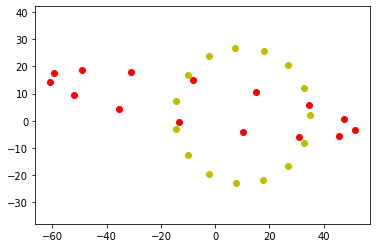

In [101]:
l = np.loadtxt('xy_circle.txt')  # Import
l_t = np.loadtxt('xy_transformed.txt')
# print(points_raw)
# print(points_t)
xdiff = (np.max(l_t[:,0])-np.min(l_t[:,0]))*0.5
ydiff = (np.max(l_t[:,1])-np.min(l_t[:,1]))*0.5
if xdiff > ydiff:
    tempA = xdiff
    tempB = ydiff
else:
    tempB = xdiff
    tempA = ydiff
x0 = np.hstack((np.mean(l, axis=0), np.array([tempA,tempB, -0.3])))
plt.plot(l[:,0],l[:,1],'yo')
plt.plot(l_t[:,0],l_t[:,1],'ro')
plt.axis('equal')

Ellipse function:
$\frac{(x \cos \alpha+y \sin \alpha)^{2}}{a^{2}}+\frac{(x \sin \alpha-y \cos \alpha)^{2}}{b^{2}}=1$

Function derivative by variables:
$\frac{\partial}{\partial a}\left(\frac{(x \cos (\alpha)+y \sin (\alpha))^{2}}{a^{2}}+\frac{(x \sin (\alpha)-y \cos (\alpha))^{2}}{b^{2}}-1\right)=-\frac{2(x \cos (\alpha)+y \sin (\alpha))^{2}}{a^{3}}$
$\frac{\partial}{\partial b}\left(\frac{(x \cos (\alpha)+y \sin (\alpha))^{2}}{a^{2}}+\frac{(x \sin (\alpha)-y \cos (\alpha))^{2}}{b^{2}}-1\right)=-\frac{2(x \sin (\alpha)-y \cos (\alpha))^{2}}{b^{3}}$
$\begin{aligned} \frac{\partial}{\partial \alpha}\left(\frac{(x \cos (\alpha)+y \sin (\alpha))^{2}}{a^{2}}+\frac{(x \sin (\alpha)-y \cos (\alpha))^{2}}{b^{2}}-1\right) &=\\ \frac{2\left(a^{2}-b^{2}\right)(x \sin (\alpha)-y \cos (\alpha))(x \cos (\alpha)+y \sin (\alpha))}{a^{2} b^{2}} \end{aligned}$


Function derivative by measurements:

$\frac{\partial}{\partial x}\left(\frac{(x \cos (\alpha)+y \sin (\alpha))^{2}}{a^{2}}+\frac{(x \sin (\alpha)-y \cos (\alpha))^{2}}{b^{2}}-1\right)=$
$\frac{2 \cos (\alpha)(x \cos (\alpha)+y \sin (\alpha))}{a^{2}}+\frac{2 \sin (\alpha)(x \sin (\alpha)-y \cos (\alpha))}{b^{2}}$
$\\frac{\partial \left(\frac{(x \cos (\alpha )+y \sin (\alpha ))^2}{a^2}+\frac{(x \sin (\alpha )-y \cos (\alpha ))^2}{b^2}-1\right)}{\partial y}=\frac{2
\sin (\alpha ) (x \cos (\alpha )+y \sin (\alpha ))}{a^2}-\frac{2 \cos (\alpha ) (x \sin (\alpha )-y \cos (\alpha ))}{b^2}\$

Derivatives

In [102]:
def dfdx0(x, y, x0, y0, a, b, alpha):
    dy = y-y0
    dx = x-x0
    return -2*((np.cos(alpha)*(np.cos(alpha)*(dx)+np.sin(alpha)*(dy)))/(a**2)+\
             (np.sin(alpha)*(np.sin(alpha)*(dx)-np.cos(alpha)*(dy)))/(b**2))
def dfdy0(x, y, x0, y0, a, b, alpha):
    dy = y-y0
    dx = x-x0
    return ((2*np.cos(alpha)*(np.sin(alpha)*(dx)-np.cos(alpha)*(dy)))/(b**2)-\
             (2*np.sin(alpha)*(np.cos(alpha)*(dx)+np.sin(alpha)*(dy)))/(a**2))
def dfdx(x, y, x0, y0, a, b, alpha):
    dy = y-y0
    dx = x-x0
    return ((2*np.cos(alpha)*(np.cos(alpha)*(dx)+np.sin(alpha)*(dy)))/(a**2)+\
             (2*np.sin(alpha)*(np.sin(alpha)*(dx)-np.cos(alpha)*(dy)))/(b**2))
def dfdy(x, y, x0, y0, a, b, alpha):
    dy = y-y0
    dx = x-x0
    return ((2*np.sin(alpha)*(np.cos(alpha)*(dx)+np.sin(alpha)*(dy)))/(a**2)-\
             (2*np.cos(alpha)*(np.sin(alpha)*(dx)-np.cos(alpha)*(dy)))/(b**2))
def dfda(x, y, x0, y0, a, b, alpha):
    dy = y-y0
    dx = x-x0
    return -(2*(np.cos(alpha)*(dx)+np.sin(alpha)*(dy))**2)/(a**3)
def dfdb(x, y, x0, y0, a, b, alpha):
    dy = y-y0
    dx = x-x0
    return -(2*(np.sin(alpha)*(dx)+np.cos(alpha)*(-dy))**2)/(b**3)
def dfdalpha(x, y, x0, y0, a, b, alpha):
    dy = y-y0
    dx = x-x0
    return 2*(((np.sin(alpha)*(dx)-np.cos(alpha)*(dy))*(np.cos(alpha)*(dx)+np.sin(alpha)*(dy)))/(b**2)-\
              ((np.sin(alpha)*(dx)-np.cos(alpha)*(dy))*(np.cos(alpha)*(dx)+np.sin(alpha)*(dy)))/(a**2))

Initial Matrices

In [103]:
def a(l0, x0, varnum):  # Calculating Matrix A for Least Square
    result = np.zeros((l0.shape[0], varnum))
    for i in range(l0.shape[0]):
        for j in range(varnum):
            if j == 0:
                result[i, j] = dfdx0(l0[i,0],l0[i,1],x0[0],x0[1],x0[2],x0[3],x0[4])
            elif j == 1:
                result[i, j] = dfdy0(l0[i,0],l0[i,1],x0[0],x0[1],x0[2],x0[3],x0[4])
            elif j == 2:
                result[i, j] = dfda(l0[i,0],l0[i,1],x0[0],x0[1],x0[2],x0[3],x0[4])
            elif j == 3:
                result[i, j] = dfdb(l0[i,0],l0[i,1],x0[0],x0[1],x0[2],x0[3],x0[4])
            elif j == 4:
                result[i, j] = dfdalpha(l0[i,0],l0[i,1],x0[0],x0[1],x0[2],x0[3],x0[4])
    return result


def b(l0, x0):  # Calculating Matrix b for Least Square
    result = np.zeros((l0.shape[0], l0.shape[0] * 2))
    for i in range(0, l0.shape[0]):
        result[i, i * 2] = dfdx(l0[i,0],l0[i,1],x0[0],x0[1],x0[2],x0[3],x0[4])
        result[i, i * 2 + 1] = dfdy(l0[i,0],l0[i,1],x0[0],x0[1],x0[2],x0[3],x0[4])
    return result


def w(l0, x0):  # Calculating Matrix W for Least Square
    result = np.zeros((l0.shape[0], 1))
    for i in range(l0.shape[0]):
        result[i, 0] = ((l0[i,0]-x0[0])*(np.cos(x0[4]))+(l0[i,1]-x0[1])*(np.sin(x0[4])))**2/(x0[2]**2)+\
                       ((l0[i,0]-x0[0])*(np.sin(x0[4]))-(l0[i,1]-x0[1])*(np.cos(x0[4])))**2/(x0[3]**2)-1
    return result

Advanced Matrices

In [104]:

def m(lstqB):
    return np.dot(lstqB, lstqB.T)

def n(lstqA,lstqM):
    return np.dot(np.dot(lstqA.T, np.linalg.inv(lstqM)), lstqA)

def u(lstqA, lstqM, lstqW):
    return np.dot(np.dot(lstqA.T, np.linalg.inv(lstqM)), lstqW)

def delta(lstqN, lstqu):
    return np.dot(np.linalg.inv(lstqN), lstqu)

Creating initial Matrices & Iterative solution

In [105]:
deltax = np.array([1,1,1,1,1]).T
lstqW = np.ones((l_t.shape[0], 1))
while np.linalg.norm(deltax) > 0.00001:
    # print(x0)
    # print(np.linalg.norm(deltax))
    # print(np.linalg.norm(lstqW))
    lstqA = a(l_t, x0, 5)
    lstqB = b(l_t, x0)
    lstqW = w(l_t, x0)
    lstqM = m(lstqB)
    lstqN = n(lstqA, lstqM)
    lstqu = u(lstqA, lstqM, lstqW)
    deltax = -delta(lstqN, lstqu)
    x0 = x0 + deltax[:,0]

Final Result

Vector x (x0,y0,a,b,alpha(rad)): [-4.99   6.274 57.269  8.175 -0.167]
max(abs(W): 0.07301026891518433


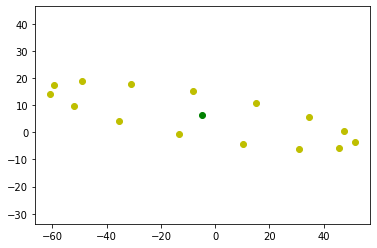

In [110]:
print('Vector x (x0,y0,a,b,alpha(rad)):', np.round(x0,3))
plt.plot(l_t[:,0],l_t[:,1],'yo')
plt.plot(x0[0],x0[1],'go')
plt.axis('equal')
print('max(abs(W):', np.max(np.sqrt(np.absolute(lstqW))))
